In [ ]:
# import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet('train_seg1.parquet')
oos = pd.read_parquet('oos_seg1.parquet')
oot = pd.read_parquet('oot_seg1.parquet')

In [3]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)

Binning 

Skip FLAG_DEPOSIT: Biến hằng số (1 unique value)
Skip AVG_OD_DPD_12M: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[O, M]",250051,0.506309,245129,4922,0.019684,0.002376,0.000003,3.569283e-07
1,[F],243819,0.493691,238997,4822,0.019777,-0.002431,0.000003,3.652072e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000006,7.221355e-07


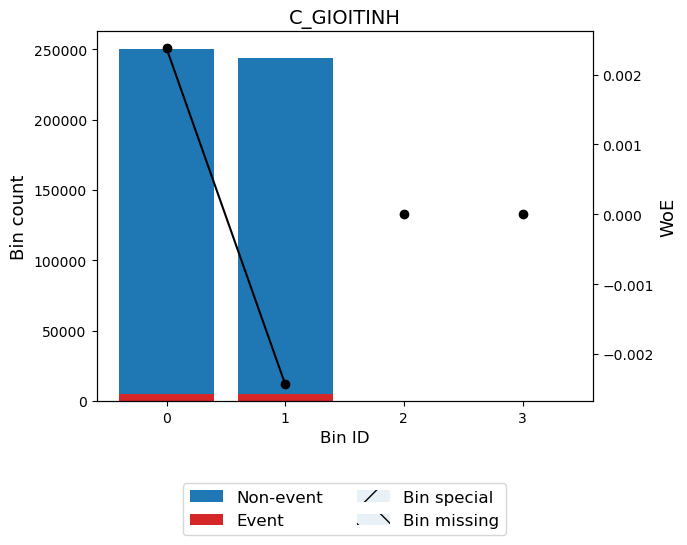


Processing: TRINHDO
   -> STATUS: OPTIMAL
   -> IV: 0.1016
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[4.0, 3.0]",120430,0.243850,119002,1428,0.011858,0.517172,0.051333,0.006346
1,"[nan, 2.0]",238235,0.482384,233798,4437,0.018624,0.058786,0.001621,0.000203
2,[1.0],135205,0.273766,131326,3879,0.028690,-0.383588,0.048649,0.006044
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.101603,0.012593


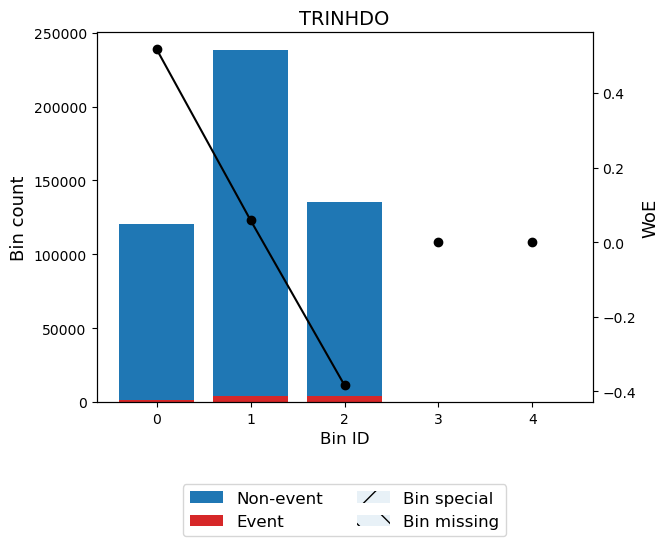


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0395
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],304768,0.617102,299693,5075,0.016652,0.172739,0.016964,0.002118
1,[Single],189102,0.382898,184433,4669,0.024690,-0.229352,0.022524,0.002809
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.039488,0.004927


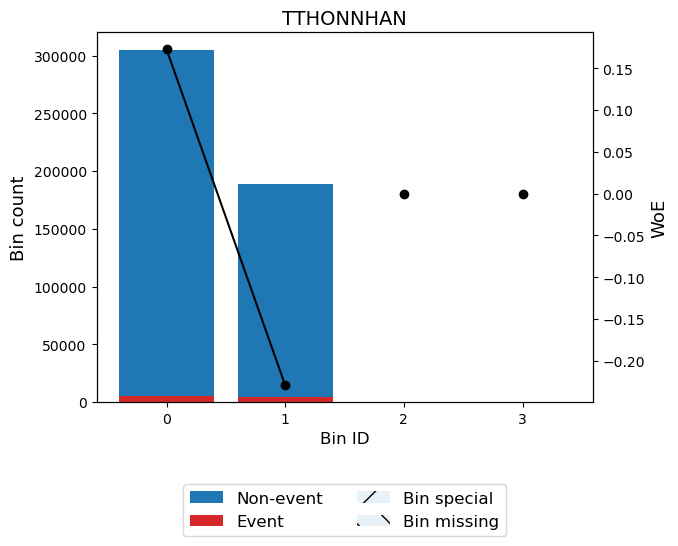


Processing: SOHUUNHA
   -> STATUS: OPTIMAL
   -> IV: 0.4308
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",293560,0.594407,285089,8471,0.028856,-0.389541,0.109259,0.013572
1,"[0.50, inf)",200310,0.405593,199037,1273,0.006355,1.146421,0.321550,0.038128
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.430809,0.051700


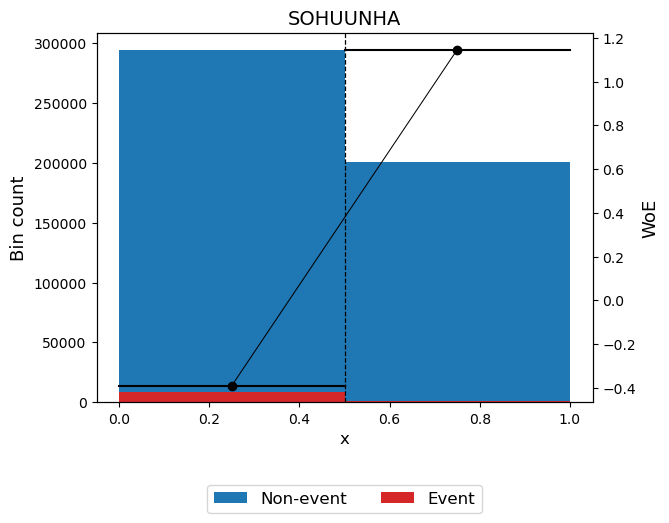


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",493870,1.0,484126,9744,0.01973,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.00000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.00000,0.0,0.0,0.0
Totals,,493870,1.0,484126,9744,0.01973,,0.0,0.0


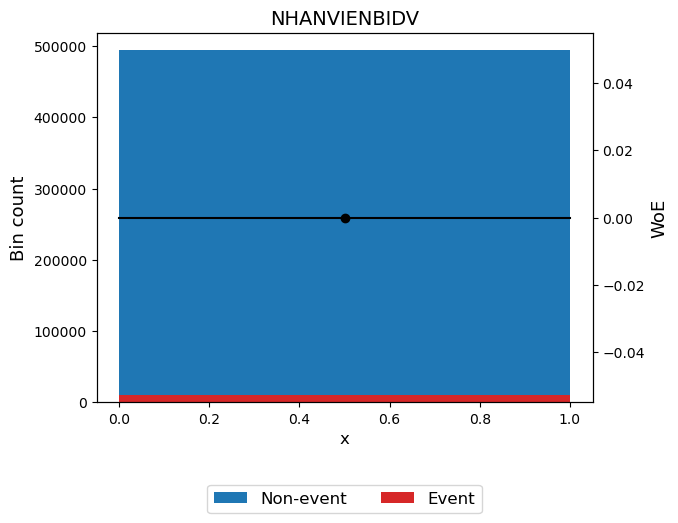


Processing: BASE_AUM
   -> STATUS: OPTIMAL
   -> IV: 0.0644
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10083228.00)",166903,0.337949,163007,3896,0.023343,-0.171851,0.010849,0.001354
1,"[10083228.00, 17412886.00)",132688,0.268670,129775,2913,0.021954,-0.109075,0.003370,0.000421
2,"[17412886.00, 25662517.00)",78292,0.158528,76782,1510,0.019287,0.023167,0.000084,0.000011
3,"[25662517.00, 39748966.00)",59667,0.120815,58805,862,0.014447,0.317033,0.010463,0.001302
4,"[39748966.00, inf)",56320,0.114038,55757,563,0.009996,0.689785,0.039588,0.004853
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.064353,0.007941


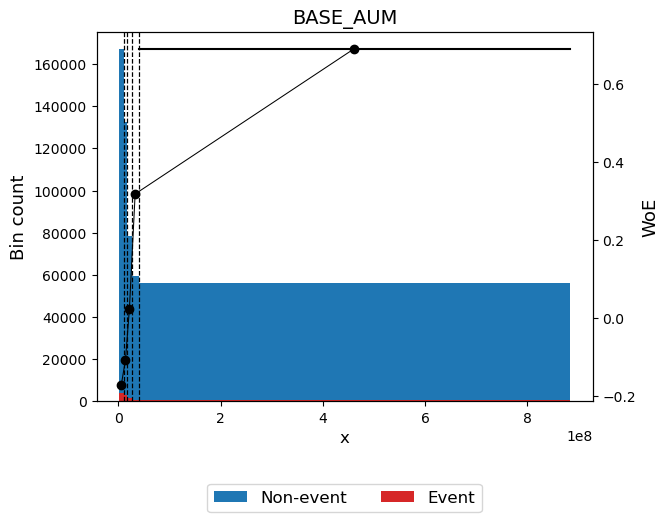


Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.1171
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",86902,0.175961,83960,2942,0.033854,-0.554443,0.071248,0.008794
1,"[30.50, 35.50)",81875,0.165782,80170,1705,0.020824,-0.055109,0.000517,0.000065
2,"[35.50, 39.50)",80080,0.162148,78542,1538,0.019206,0.027457,0.000121,0.000015
3,"[39.50, 45.50)",115051,0.232958,113218,1833,0.015932,0.217668,0.009957,0.001242
4,"[45.50, inf)",129962,0.263150,128236,1726,0.013281,0.402372,0.035307,0.004384
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.117150,0.014499


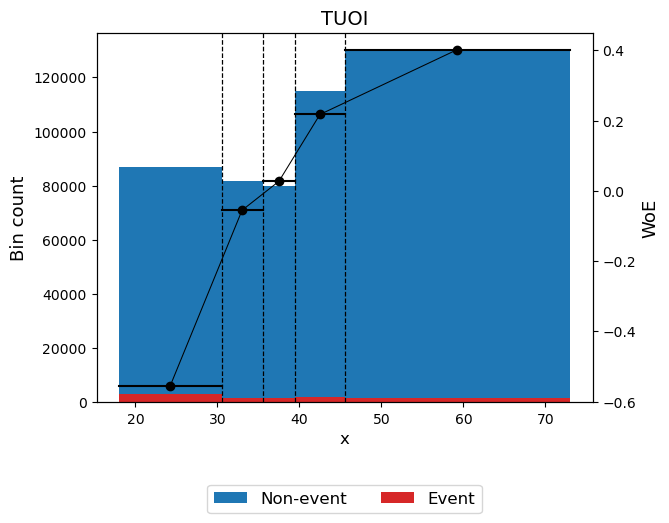


Processing: INCOME
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[6, 0](0..1), coeff=29908, offset=0), IntAffine(expr=x[6, 1](0..1), coeff=341, offset=0), IntAffine(expr=x[6, 2](0..1), coeff=-234, offset=0), IntAffine(expr=x[6, 3](0..1), coeff=-250, offset=0), IntAffine(expr=x[6, 4](0..1), coeff=531, offset=0), IntAffine(expr=x[6, 5](0..1), coeff=61, offset=0)), IntConstant(0)

Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.0373
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 161460016.00)",60262,0.122020,59516,746,0.012379,0.473581,0.021962,2.719922e-03
1,"[161460016.00, 259650032.00)",109486,0.221690,107545,1941,0.017728,0.109013,0.002501,3.124807e-04
2,"[259650032.00, 377118272.00)",117522,0.237961,115215,2307,0.019630,0.005158,0.000006,7.895568e-07
3,"[377118272.00, 483800432.00)",75143,0.152151,73554,1589,0.021146,-0.070779,0.000789,9.856679e-05
4,"[483800432.00, inf)",131457,0.266177,128296,3161,0.024046,-0.202242,0.012013,1.499076e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.037271,4.630835e-03


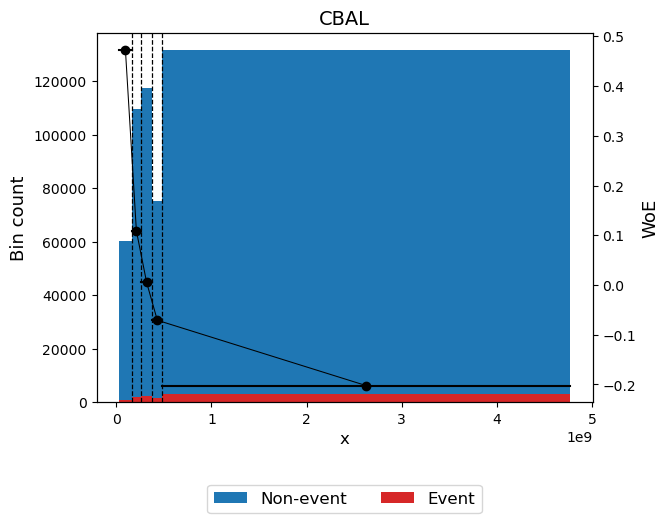


Processing: CBALORG
   -> STATUS: OPTIMAL
   -> IV: 0.0365
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 166779048.00)",51206,0.103683,50590,616,0.012030,0.502569,0.020746,0.002566
1,"[166779048.00, 219389376.00)",50846,0.102954,50004,842,0.016560,0.178385,0.003010,0.000376
2,"[219389376.00, 310586896.00)",93359,0.189036,91621,1738,0.018616,0.059232,0.000645,0.000081
3,"[310586896.00, 484826352.00)",140383,0.284251,137573,2810,0.020017,-0.014723,0.000062,0.000008
4,"[484826352.00, inf)",158076,0.320076,154338,3738,0.023647,-0.185099,0.011999,0.001498
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.036461,0.004528


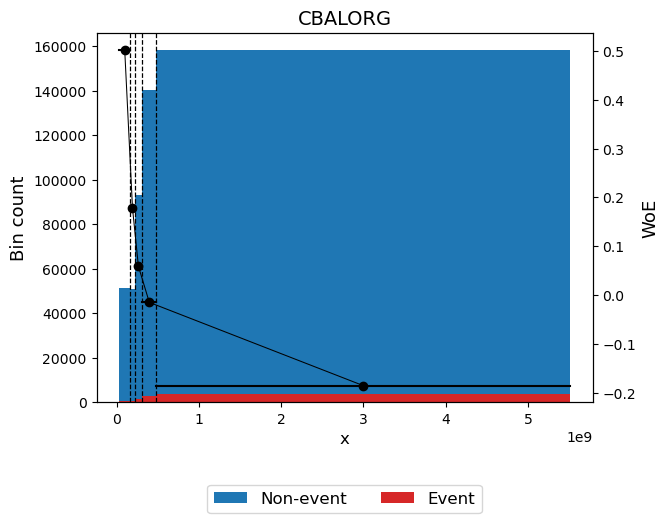


Processing: AFLIMT_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[7, 0](0..1), coeff=5376, offset=0), IntAffine(expr=x[7, 1](0..1), coeff=-575, offset=0), IntAffine(expr=x[7, 2](0..1), coeff=246, offset=0), IntAffine(expr=x[7, 3](0..1), coeff=-625, offset=0), IntAffine(expr=x[7, 4](0..1), coeff=-392, offset=0), IntAffine(expr=x[7, 5](0..1), coeff=1112, offset=0), IntAffine(expr=x[7, 6](0..1), coeff=234, offset=0)), IntConstant(0)

Processing: AFLIMT_MIN
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked wi

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 157525904.00)",59477,0.120430,58713,764,0.012845,0.436155,0.018698,0.002319
1,"[157525904.00, 215119352.00)",63171,0.127910,62096,1075,0.017017,0.150667,0.002703,0.000338
2,"[215119352.00, 396959424.00)",182011,0.368540,178505,3506,0.019263,0.024447,0.000218,0.000027
3,"[396959424.00, 484711296.00)",57915,0.117268,56664,1251,0.021601,-0.092498,0.001049,0.000131
4,"[484711296.00, inf)",131296,0.265851,128148,3148,0.023976,-0.199275,0.011632,0.001452
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.034299,0.004266


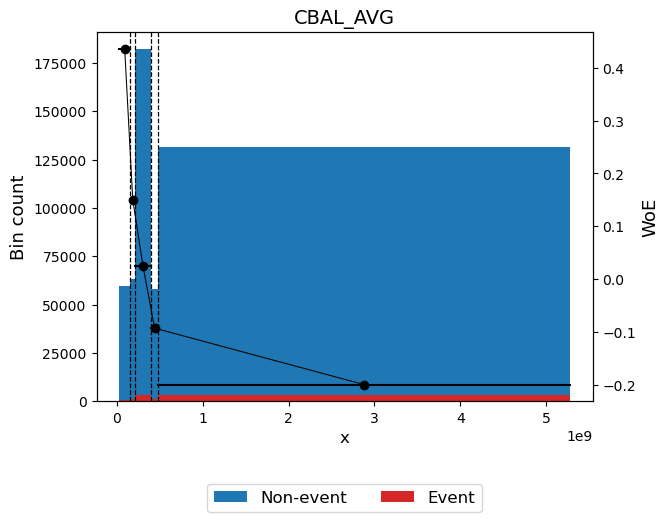


Processing: CBAL_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0346
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 189029000.00)",59083,0.119633,58327,756,0.012796,0.440086,0.018876,0.002341
1,"[189029000.00, 259226304.00)",64013,0.129615,62924,1089,0.017012,0.150974,0.002750,0.000343
2,"[259226304.00, 476350416.00)",181124,0.366744,177633,3491,0.019274,0.023838,0.000206,0.000026
3,"[476350416.00, 581395808.00)",57860,0.117156,56614,1246,0.021535,-0.089376,0.000977,0.000122
4,"[581395808.00, inf)",131790,0.266852,128628,3162,0.023993,-0.199974,0.011762,0.001468
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.034571,0.004300


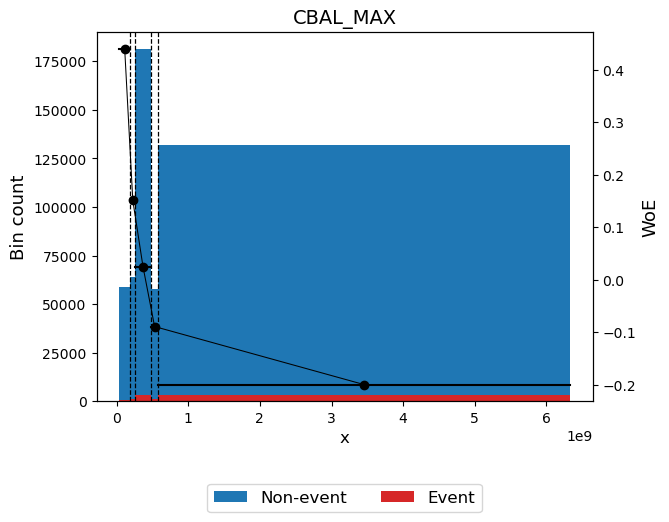


Processing: CBAL_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0343
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 126020720.00)",59477,0.120430,58713,764,0.012845,0.436155,0.018698,0.002319
1,"[126020720.00, 172095488.00)",63171,0.127910,62096,1075,0.017017,0.150667,0.002703,0.000338
2,"[172095488.00, 317567552.00)",182011,0.368540,178505,3506,0.019263,0.024447,0.000218,0.000027
3,"[317567552.00, 387769024.00)",57915,0.117268,56664,1251,0.021601,-0.092498,0.001049,0.000131
4,"[387769024.00, inf)",131296,0.265851,128148,3148,0.023976,-0.199275,0.011632,0.001452
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.034299,0.004266


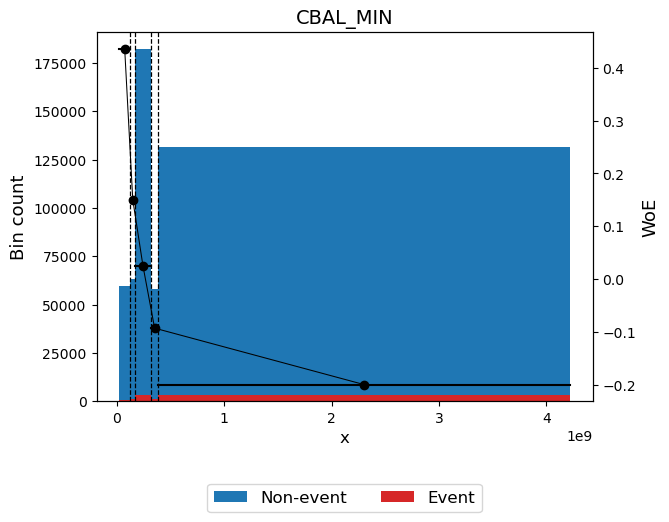


Processing: COLLATERAL_VALUE
   -> STATUS: OPTIMAL
   -> IV: 0.4610
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11341627.00)",112278,0.227343,108639,3639,0.032411,-0.509372,0.075926,0.009389
1,"[11341627.00, 42335434.00)",82402,0.166850,80219,2183,0.026492,-0.301633,0.017596,0.002191
2,"[42335434.00, 2007358976.00)",60503,0.122508,60007,496,0.008198,0.889947,0.065007,0.007868
3,"[2007358976.00, 2020931392.00)",96714,0.195829,96056,658,0.006804,1.077788,0.141064,0.016826
4,"[2020931392.00, inf)",54079,0.109500,53837,242,0.004475,1.499085,0.129474,0.014821
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,87894,0.177970,85368,2526,0.028739,-0.385359,0.031947,0.003969
Totals,,493870,1.000000,484126,9744,0.019730,,0.461014,0.055065


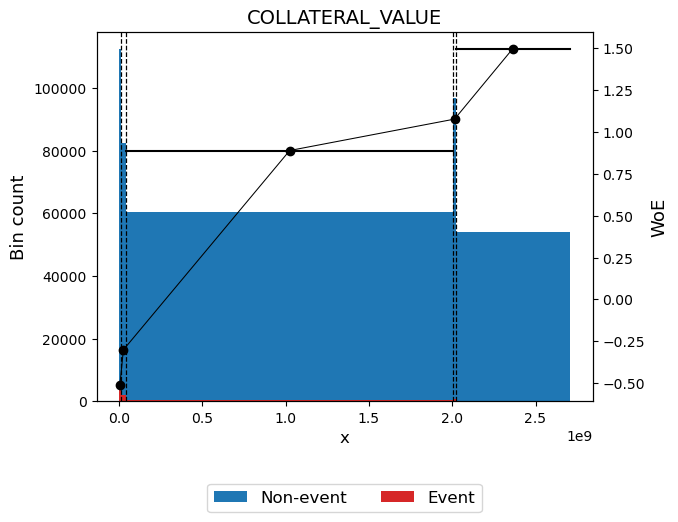


Processing: LTV
   -> STATUS: OPTIMAL
   -> IV: 0.4502
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 12.40)",61887,0.125310,61607,280,0.004524,1.488048,0.146600,0.016802
1,"[12.40, 19.81)",59461,0.120398,59111,350,0.005886,1.223546,0.105444,0.012415
2,"[19.81, 195.09)",79838,0.161658,79191,647,0.008104,0.901578,0.087611,0.010595
3,"[195.09, inf)",292684,0.592634,284217,8467,0.028929,-0.392132,0.110531,0.013729
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.450186,0.053541


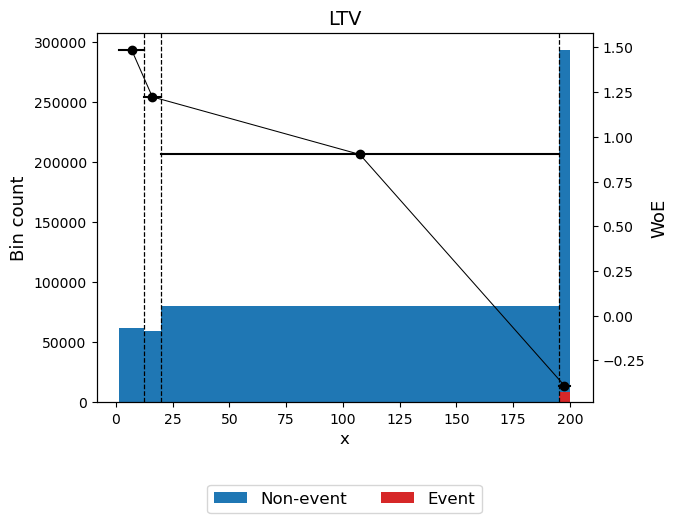


Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.4957
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2592813.00)",89593,0.181410,85947,3646,0.040695,-0.745593,0.146620,0.017914
1,"[2592813.00, 3704846.00)",110472,0.223686,107425,3047,0.027582,-0.343058,0.031153,0.003875
2,"[3704846.00, 5637439.50)",106051,0.214735,104264,1787,0.016850,0.160694,0.005137,0.000641
3,"[5637439.50, 9800770.00)",95755,0.193887,94887,868,0.009065,0.788557,0.084309,0.010274
4,"[9800770.00, inf)",91999,0.186282,91603,396,0.004304,1.538112,0.228521,0.026045
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.495742,0.058750


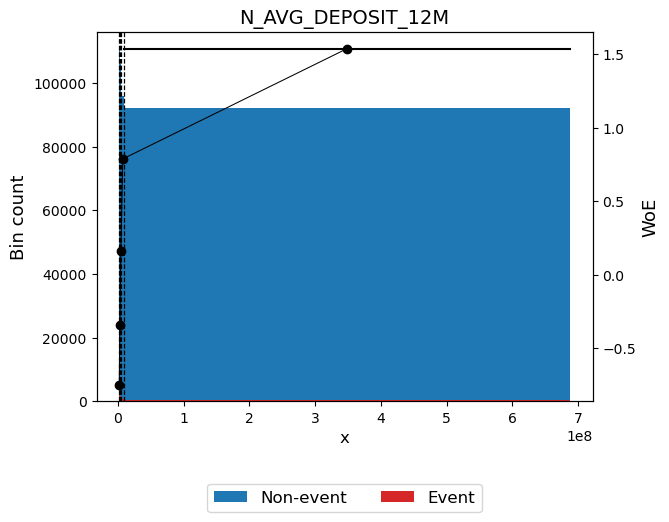


Processing: N_AVG_DEPOSIT_6M
   -> STATUS: OPTIMAL
   -> IV: 0.4957
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2592813.00)",89593,0.181410,85947,3646,0.040695,-0.745593,0.146620,0.017914
1,"[2592813.00, 3704846.00)",110472,0.223686,107425,3047,0.027582,-0.343058,0.031153,0.003875
2,"[3704846.00, 5637439.50)",106051,0.214735,104264,1787,0.016850,0.160694,0.005137,0.000641
3,"[5637439.50, 9800770.00)",95755,0.193887,94887,868,0.009065,0.788557,0.084309,0.010274
4,"[9800770.00, inf)",91999,0.186282,91603,396,0.004304,1.538112,0.228521,0.026045
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.495742,0.058750


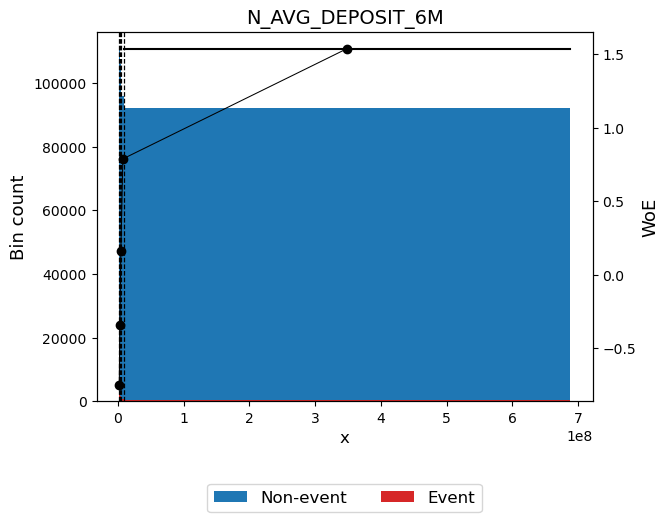


Processing: N_AVG_DD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.4957
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 518562.50)",89593,0.181410,85947,3646,0.040695,-0.745593,0.146620,0.017914
1,"[518562.50, 740972.00)",110473,0.223688,107426,3047,0.027581,-0.343049,0.031152,0.003875
2,"[740972.00, 1127487.50)",106050,0.214733,104263,1787,0.016851,0.160685,0.005137,0.000641
3,"[1127487.50, 1960153.50)",95755,0.193887,94887,868,0.009065,0.788557,0.084309,0.010274
4,"[1960153.50, inf)",91999,0.186282,91603,396,0.004304,1.538112,0.228521,0.026045
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.495739,0.058750


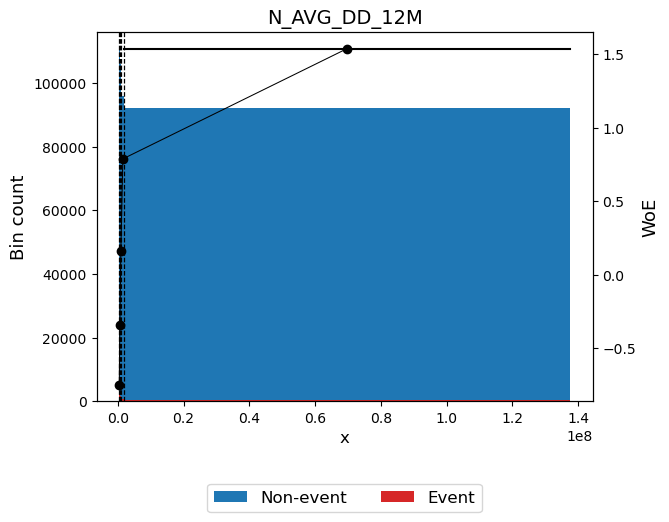


Processing: N_AVG_CD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.4957
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2074250.50)",89593,0.181410,85947,3646,0.040695,-0.745593,0.146620,0.017914
1,"[2074250.50, 2963877.00)",110472,0.223686,107425,3047,0.027582,-0.343058,0.031153,0.003875
2,"[2963877.00, 4509952.00)",106051,0.214735,104264,1787,0.016850,0.160694,0.005137,0.000641
3,"[4509952.00, 7840616.50)",95755,0.193887,94887,868,0.009065,0.788557,0.084309,0.010274
4,"[7840616.50, inf)",91999,0.186282,91603,396,0.004304,1.538112,0.228521,0.026045
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.495742,0.058750


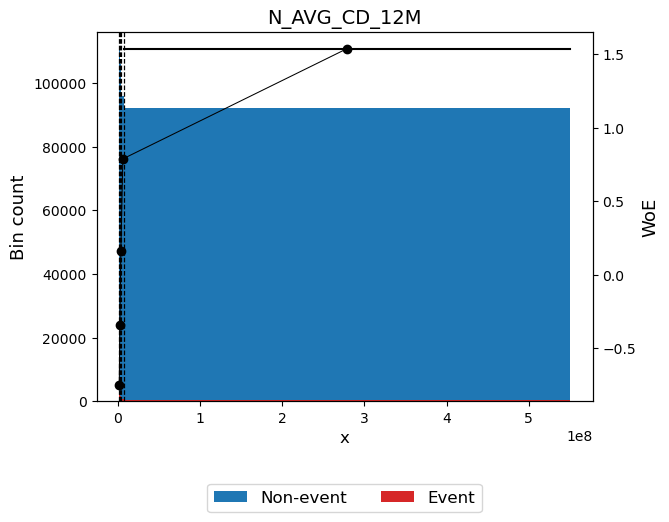


Processing: FLAG_SALARY_ACC
   -> STATUS: INFEASIBLE
   -> Skip: Không tạo được bin tối ưu

Processing: UTILIZATION_RATE
   -> STATUS: OPTIMAL
   -> IV: 0.1733
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.36)",156604,0.317096,154859,1745,0.011143,0.580067,0.081667,0.010068
1,"[0.36, 0.51)",119621,0.242212,117664,1957,0.016360,0.190727,0.008049,0.001005
2,"[0.51, 0.61)",71806,0.145395,70241,1565,0.021795,-0.101647,0.001578,0.000197
3,"[0.61, 0.71)",77364,0.156649,75266,2098,0.027119,-0.325649,0.019488,0.002425
4,"[0.71, inf)",68475,0.138650,66096,2379,0.034743,-0.581265,0.062558,0.007711
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.173340,0.021406


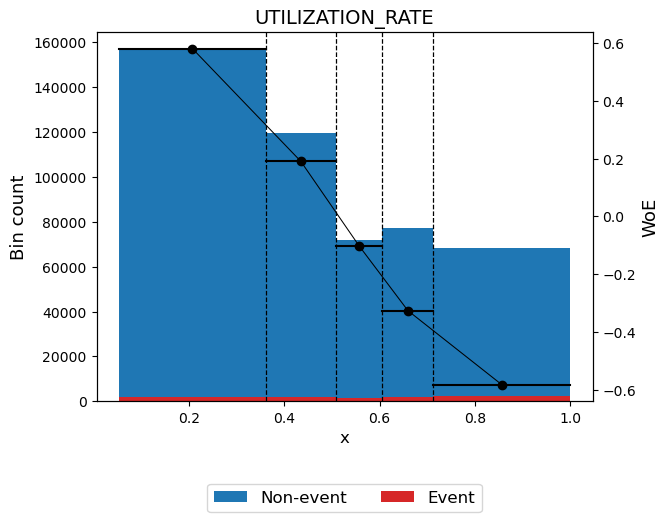


Processing: CNT_CREDIT_CARDS
   -> STATUS: OPTIMAL
   -> IV: 0.0004
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",399210,0.80833,391406,7804,0.019549,0.009415,0.000071,0.000009
1,"[2.50, inf)",94660,0.19167,92720,1940,0.020494,-0.038797,0.000294,0.000037
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.00000,484126,9744,0.019730,,0.000365,0.000046


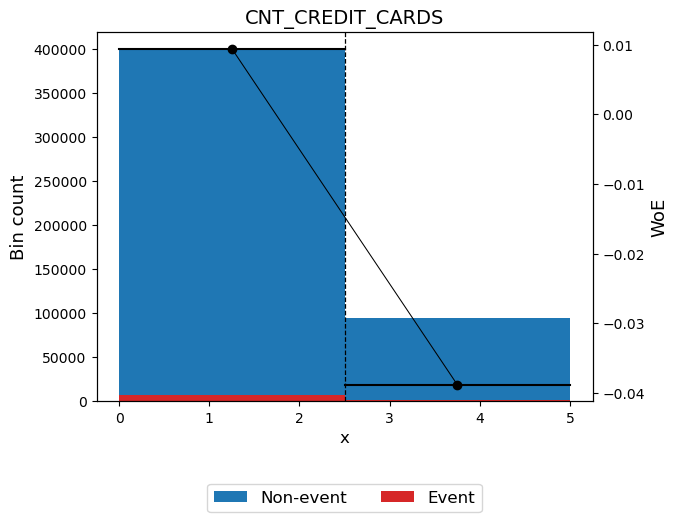


Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0498
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 39247570.00)",437341,0.885539,429471,7870,0.017995,0.093803,0.007451,0.000931
1,"[39247570.00, inf)",56529,0.114461,54655,1874,0.033151,-0.532728,0.042314,0.005228
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.049765,0.006159


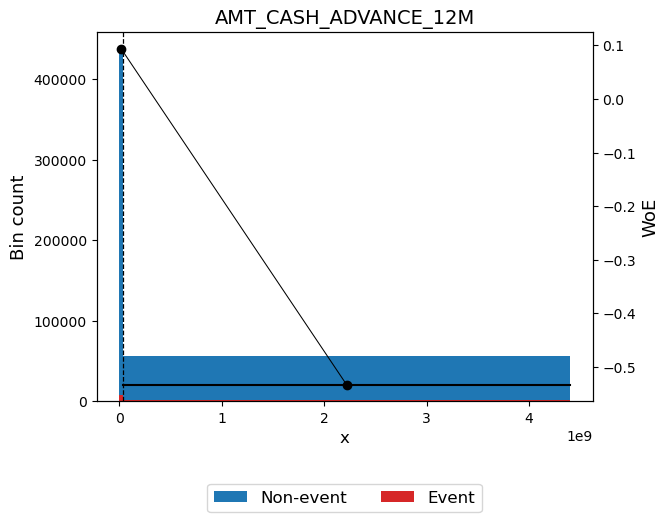


Processing: FLAG_CASH_ADVANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0497
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",437330,0.885516,429460,7870,0.017996,0.093777,0.007447,0.000930
1,"[0.50, inf)",56540,0.114484,54666,1874,0.033145,-0.532527,0.042286,0.005224
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.049733,0.006155


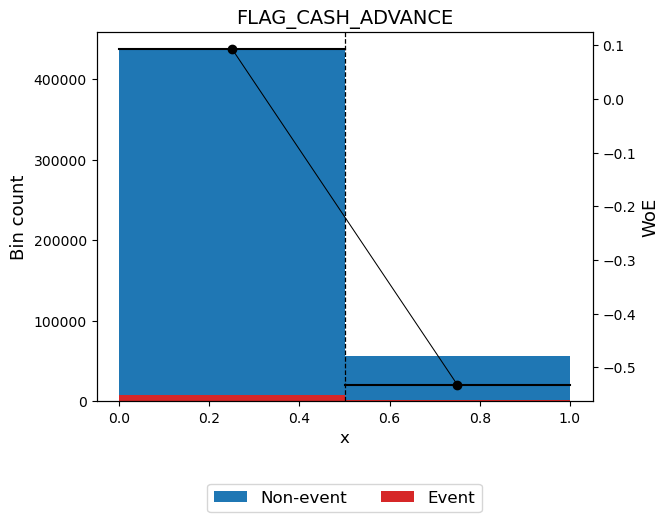


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.1199
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.81)",75750,0.153380,73212,2538,0.033505,-0.543711,0.059397,0.007334
1,"[0.81, 0.99)",77379,0.156679,75558,1821,0.023534,-0.180179,0.005552,0.000693
2,"[0.99, 1.13)",78385,0.158716,76768,1617,0.020629,-0.045478,0.000336,0.000042
3,"[1.13, 1.40)",142853,0.289252,140576,2277,0.015939,0.217196,0.012312,0.001536
4,"[1.40, inf)",119503,0.241973,118012,1491,0.012477,0.465646,0.042255,0.005235
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.119852,0.014840


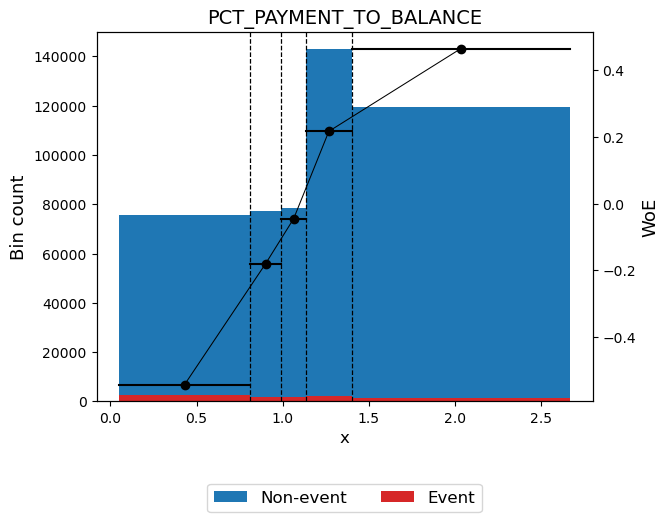


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.2985
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",398937,0.807777,393431,5506,0.013802,0.363374,0.089970,0.011185
1,"[0.50, inf)",94933,0.192223,90695,4238,0.044642,-0.842283,0.208546,0.025324
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.298517,0.036509


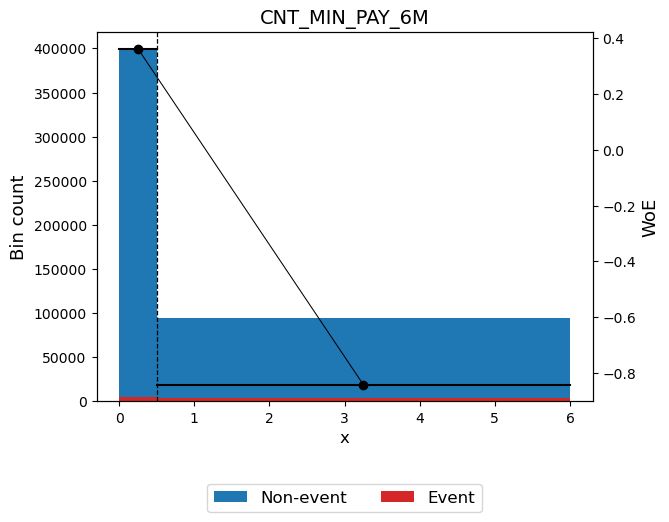


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.2829
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",399423,0.808761,393837,5586,0.013985,0.34998,0.084074,0.010456
1,"[0.50, inf)",94447,0.191239,90289,4158,0.044025,-0.827712,0.198837,0.024169
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.282911,0.034625


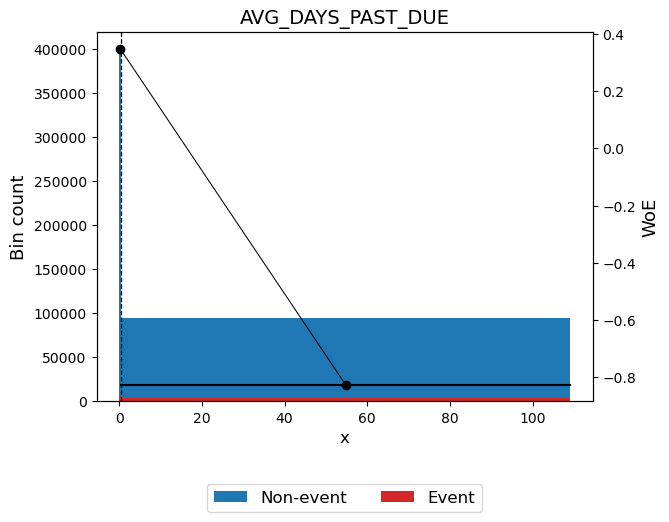


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.2126
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.68)",79775,0.161530,78979,796,0.009978,0.691645,0.056332,0.006904
1,"[0.68, 1.04)",122592,0.248227,121000,1592,0.012986,0.425106,0.036794,0.004565
2,"[1.04, 1.56)",154572,0.312981,151666,2906,0.018800,0.04921,0.000740,0.000093
3,"[1.56, 1.99)",75370,0.152611,73482,1888,0.025050,-0.244171,0.010250,0.001278
4,"[1.99, inf)",61561,0.124650,58999,2562,0.041617,-0.768961,0.108473,0.013235
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.212588,0.026074


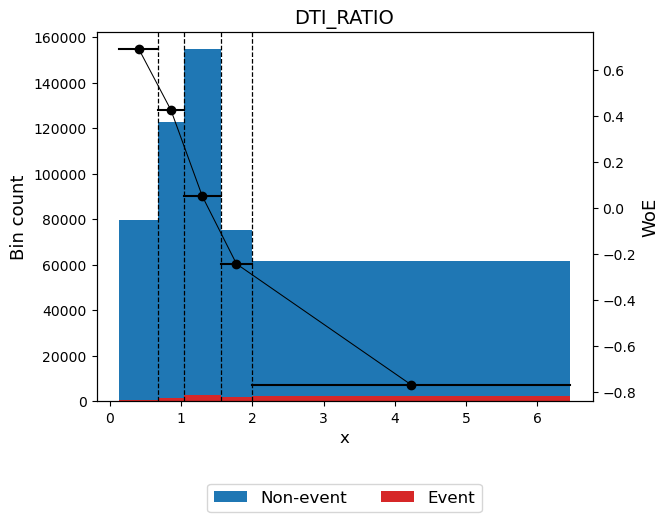


Processing: PTI_RATIO
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[8, 0](0..1), coeff=22886, offset=0), IntAffine(expr=x[8, 1](0..1), coeff=20145, offset=0), IntAffine(expr=x[8, 2](0..1), coeff=8427, offset=0), IntAffine(expr=x[8, 3](0..1), coeff=12656, offset=0), IntAffine(expr=x[8, 4](0..1), coeff=5334, offset=0), IntAffine(expr=x[8, 5](0..1), coeff=3826, offset=0), IntAffine(expr=x[8, 6](0..1), coeff=1529, offset=0), IntAffine(expr=x[8, 7](0..1), coeff=1852, offset=0)), IntConstant(0)

Processing: MOB
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",420319,0.851072,412015,8304,0.019756,-0.001371,0.000002,2.001137e-07
1,"[1.50, inf)",73551,0.148928,72111,1440,0.019578,0.00787,0.000009,1.148663e-06
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000011,1.348777e-06


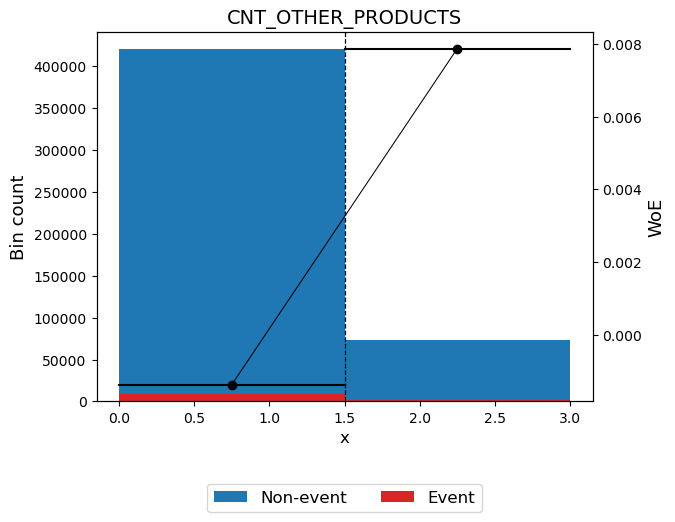


Processing: LIMIT_TO_INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0505
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 27.94)",139811,0.283093,137522,2289,0.016372,0.189975,0.009337,0.001165
1,"[27.94, 29.81)",70030,0.141798,68802,1228,0.017535,0.120152,0.001933,0.000242
2,"[29.81, 34.27)",171652,0.347565,168585,3067,0.017868,0.101047,0.003382,0.000423
3,"[34.27, inf)",112377,0.227544,109217,3160,0.028120,-0.362929,0.035823,0.004453
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.050475,0.006283


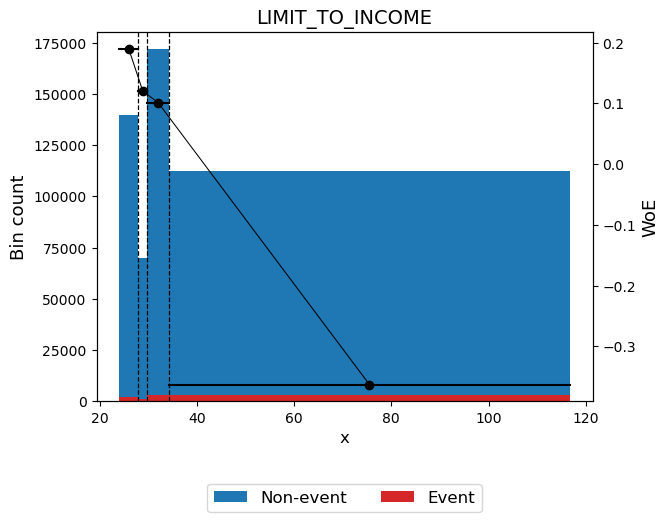


Processing: AMT_VAR_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.22)",67261,0.136192,65963,1298,0.019298,0.022576,6.866538e-05,8.582991e-06
1,"[-0.22, 0.18)",337972,0.684334,331304,6668,0.019729,0.000023,3.596687e-10,4.495855e-11
2,"[0.18, inf)",88637,0.179474,86859,1778,0.020059,-0.016897,5.165649e-05,6.456985e-06
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,1.203222e-04,1.504002e-05


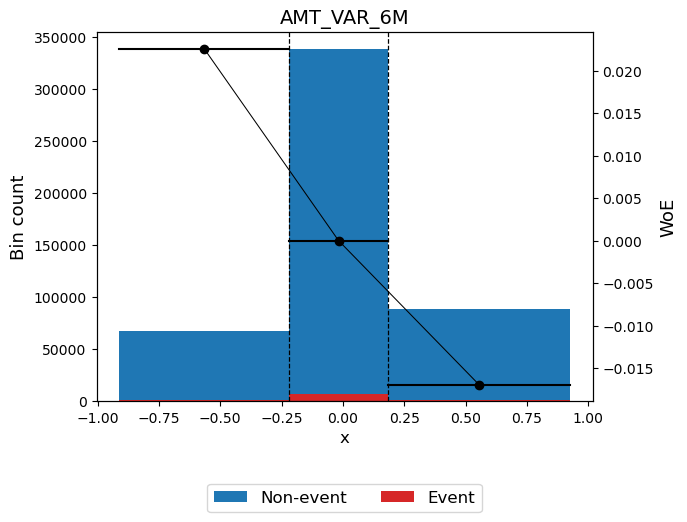


Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0087
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 63508308.00)",113193,0.229196,111188,2005,0.017713,0.109885,0.002626,0.000328
1,"[63508308.00, 161659024.00)",153158,0.310118,150297,2861,0.018680,0.055749,0.000938,0.000117
2,"[161659024.00, 248671616.00)",89394,0.181007,87578,1816,0.020315,-0.0298,0.000163,0.000020
3,"[248671616.00, 359606320.00)",65174,0.131966,63805,1369,0.021005,-0.063942,0.000556,0.000070
4,"[359606320.00, inf)",72951,0.147713,71258,1693,0.023207,-0.165889,0.004406,0.000550
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.008690,0.001085


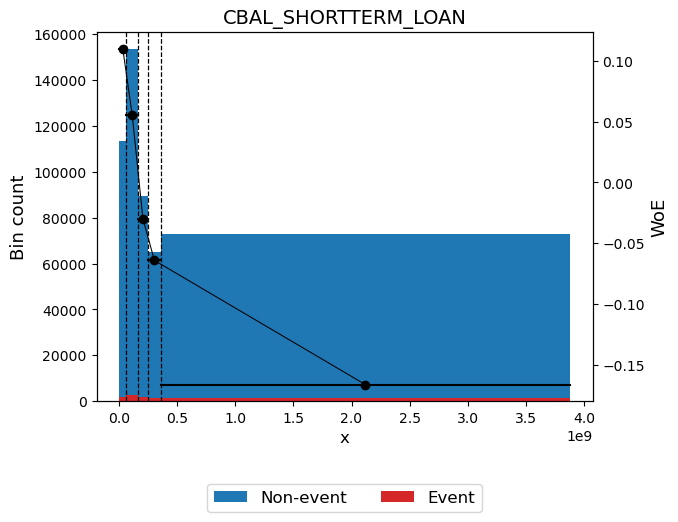


Processing: CBAL_LONGTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0159
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 37526144.00)",67242,0.136153,66100,1142,0.016983,0.152694,0.002952,0.000369
1,"[37526144.00, 101978536.00)",112289,0.227366,110321,1968,0.017526,0.120683,0.003126,0.000391
2,"[101978536.00, 189704120.00)",120316,0.243619,118046,2270,0.018867,0.045601,0.000496,0.000062
3,"[189704120.00, 249128928.00)",56277,0.113951,55137,1140,0.020257,-0.026901,0.000084,0.000010
4,"[249128928.00, inf)",137746,0.278911,134522,3224,0.023405,-0.174589,0.009254,0.001155
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.015912,0.001987


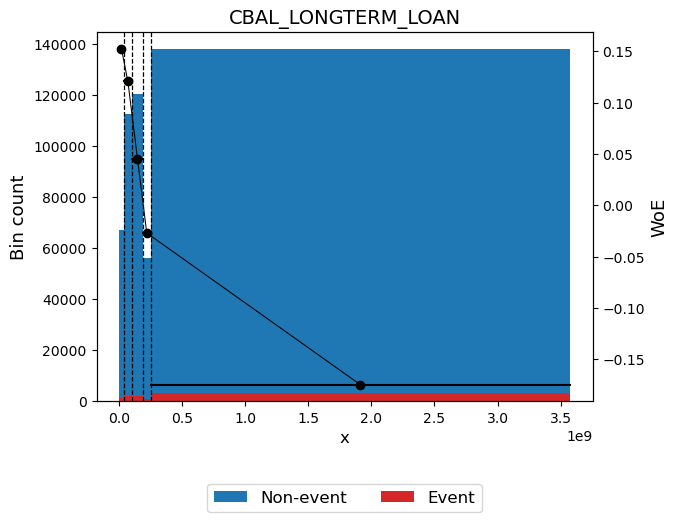


Processing: CNT_DPD_30PLUS_6M
   -> STATUS: INFEASIBLE
   -> Skip: Không tạo được bin tối ưu

Processing: OCCUPATION_TYPE
   -> STATUS: OPTIMAL
   -> IV: 0.0008
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],197201,0.399297,193419,3782,0.019178,0.028912,0.000329,4.114713e-05
1,[4],49544,0.100318,48578,966,0.019498,0.012069,0.000015,1.815900e-06
2,[3],99093,0.200646,97130,1963,0.019810,-0.004117,0.000003,4.259770e-07
3,[2],148032,0.299739,144999,3033,0.020489,-0.038519,0.000453,5.662759e-05
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000800,1.000166e-04


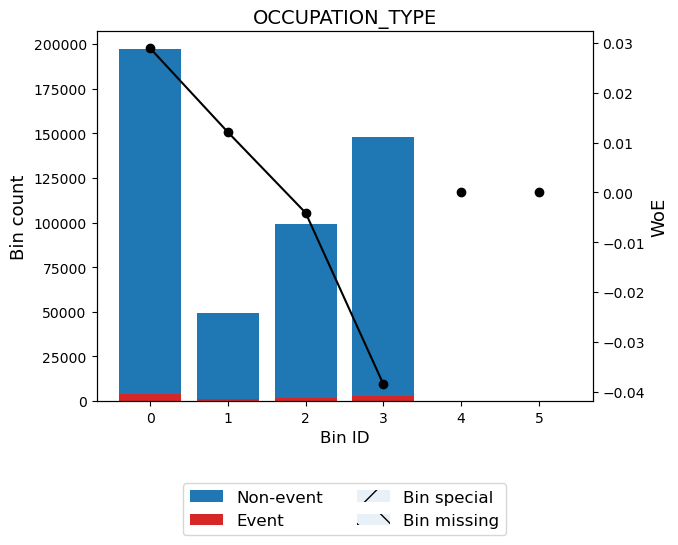


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.00)",160616,0.325219,157488,3128,0.019475,0.013262,0.000057,7.104508e-06
1,"[48.00, 150.00)",237592,0.481082,232912,4680,0.019698,0.001669,0.000001,1.673957e-07
2,"[150.00, inf)",95662,0.193699,93726,1936,0.020238,-0.025942,0.000132,1.649859e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000190,2.377049e-05


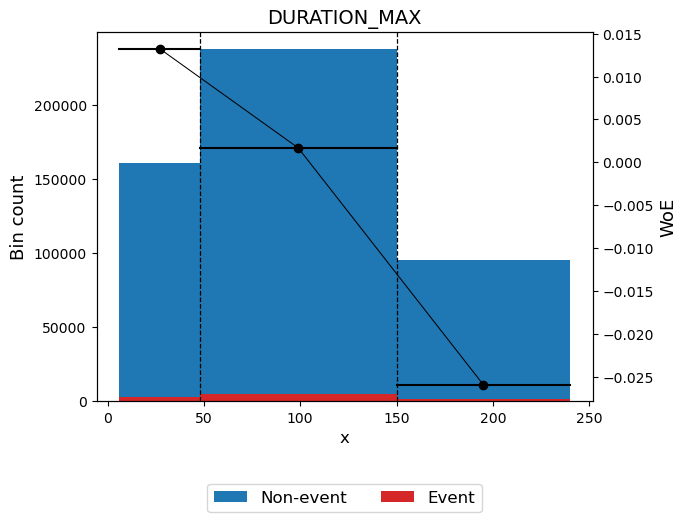


Processing: REMAINING_DURATION_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[13, 0](0..1), coeff=-3, offset=0), IntAffine(expr=x[13, 1](0..1), coeff=14, offset=0), IntAffine(expr=x[13, 2](0..1), coeff=-2, offset=0), IntAffine(expr=x[13, 3](0..1), coeff=-18, offset=0), IntAffine(expr=x[13, 4](0..1), coeff=15, offset=0), IntAffine(expr=x[13, 5](0..1), coeff=-12, offset=0), IntAffine(expr=x[13, 6](0..1), coeff=15, offset=0), IntAffine(expr=x[13, 7](0..1), coeff=-16, offset=0), IntAffine(expr=x[13, 8](0..1), coeff=18, offset=0), IntAffine(expr=x[13, 9](0..1), coeff=-19, offset=0), IntAffine(expr=x[13, 10](0..1), coeff=-4, offset=0), IntAffine(expr=x[13, 11](0..1), coeff=-108, offset=0), IntAffine(expr=x[13, 12](0..1), coeff=131,

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10.50)",75427,0.152726,74008,1419,0.018813,0.048527,0.000351,0.000044
1,"[10.50, 43.50)",249495,0.505184,244599,4896,0.019624,0.005508,0.000015,0.000002
2,"[43.50, inf)",168948,0.342090,165519,3429,0.020296,-0.028876,0.000289,0.000036
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.000656,0.000082


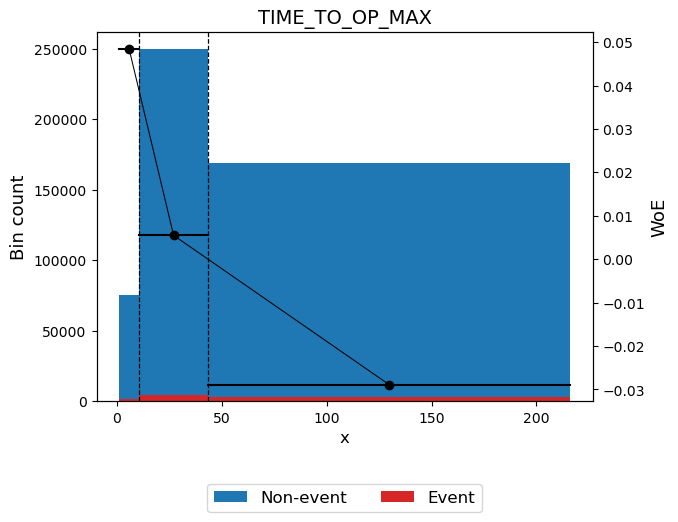


Processing: RATE_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.2648
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.14)",74534,0.150918,73862,672,0.009016,0.794002,0.066380,0.008086
1,"[6.14, 8.57)",192320,0.389414,189757,2563,0.013327,0.398872,0.051424,0.006386
2,"[8.57, 10.01)",113289,0.229390,110970,2319,0.020470,-0.03757,0.000330,0.000041
3,"[10.01, 11.04)",55054,0.111475,53465,1589,0.028863,-0.389771,0.020517,0.002549
4,"[11.04, inf)",58673,0.118803,56072,2601,0.044330,-0.834953,0.126172,0.015329
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.264823,0.032390


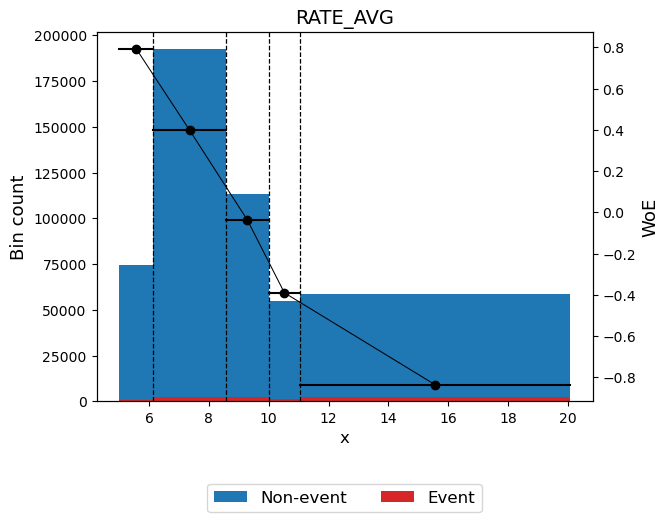


Processing: PURCOD_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[2, 0](0..1), coeff=7, offset=0), IntAffine(expr=x[2, 1](0..1), coeff=3, offset=0)), IntConstant(0)

Processing: PURCOD_MIN
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[2, 0](0..1), coeff=7, offset=0), IntAffine(expr=x[2, 1](0..1), coeff=3, offset=0)), IntConstant(0)

Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.2980
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",198726,0.402385,197686,1040,0.005233,1.341766,0.404681,0.047102
1,"[0.50, 1.50)",81346,0.164711,80622,724,0.008900,0.807042,0.074433,0.009060
2,"[1.50, 3.50)",80173,0.162336,79186,987,0.012311,0.479191,0.029840,0.003695
3,"[3.50, 9.50)",79817,0.161615,78265,1552,0.019444,0.014863,0.000035,0.000004
4,"[9.50, inf)",53808,0.108952,48367,5441,0.101119,-1.720839,0.788986,0.088012
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,1.297975,0.147873


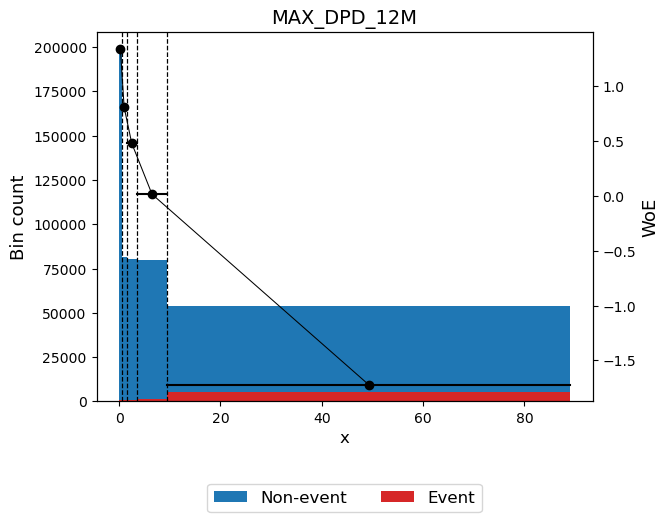


Processing: MAX_DPD_12M_OBS
   -> STATUS: OPTIMAL
   -> IV: 1.2980
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",198726,0.402385,197686,1040,0.005233,1.341766,0.404681,0.047102
1,"[0.50, 1.50)",81346,0.164711,80622,724,0.008900,0.807042,0.074433,0.009060
2,"[1.50, 3.50)",80173,0.162336,79186,987,0.012311,0.479191,0.029840,0.003695
3,"[3.50, 9.50)",79817,0.161615,78265,1552,0.019444,0.014863,0.000035,0.000004
4,"[9.50, inf)",53808,0.108952,48367,5441,0.101119,-1.720839,0.788986,0.088012
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,1.297975,0.147873


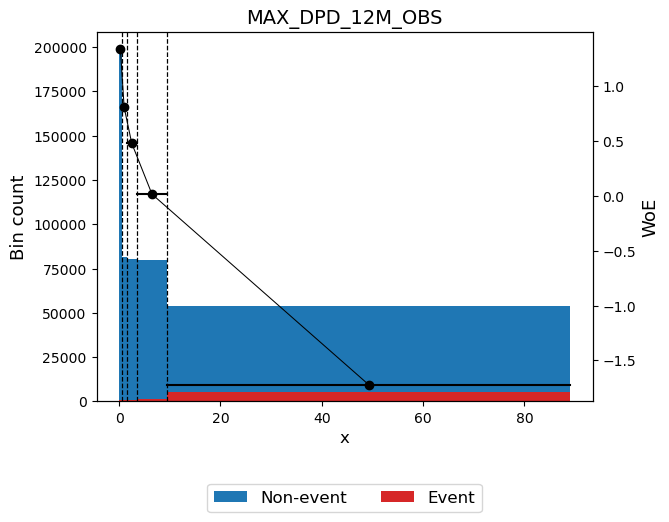


Processing: SUM_ALL_OD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.1469
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",198726,0.402385,197686,1040,0.005233,1.341766,0.404681,0.047102
1,"[0.50, 2.50)",93241,0.188797,92389,852,0.009138,0.780483,0.080701,0.009839
2,"[2.50, 5.50)",59825,0.121135,59073,752,0.012570,0.458099,0.020543,0.002546
3,"[5.50, 13.50)",68687,0.139079,67303,1384,0.020149,-0.021467,0.000065,0.000008
4,"[13.50, inf)",73391,0.148604,67675,5716,0.077884,-1.434246,0.640863,0.073878
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,1.146853,0.133374


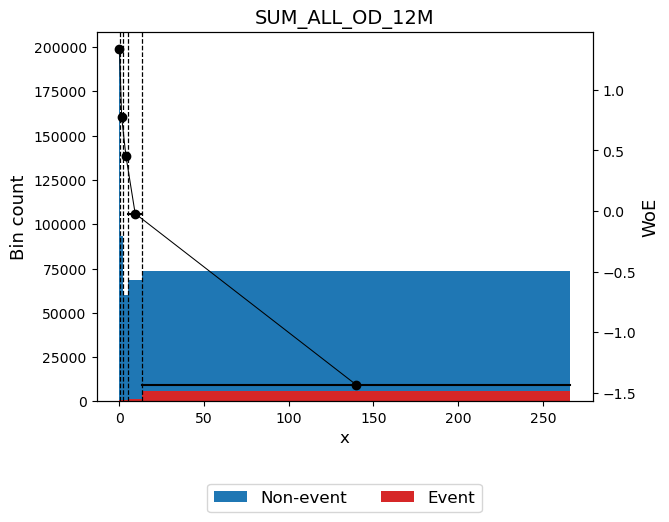


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.5224
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 59107728.00)",211105,0.427451,209867,1238,0.005864,1.227283,0.376094,0.044267
1,"[59107728.00, 135607376.00)",92887,0.188080,90538,2349,0.025289,-0.253914,0.013726,0.001711
2,"[135607376.00, 188305408.00)",62031,0.125602,60215,1816,0.029276,-0.404408,0.025070,0.003113
3,"[188305408.00, 263378992.00)",59376,0.120226,57488,1888,0.031797,-0.489635,0.036730,0.004546
4,"[263378992.00, inf)",68471,0.138642,66018,2453,0.035825,-0.613078,0.070737,0.008706
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.522356,0.062343


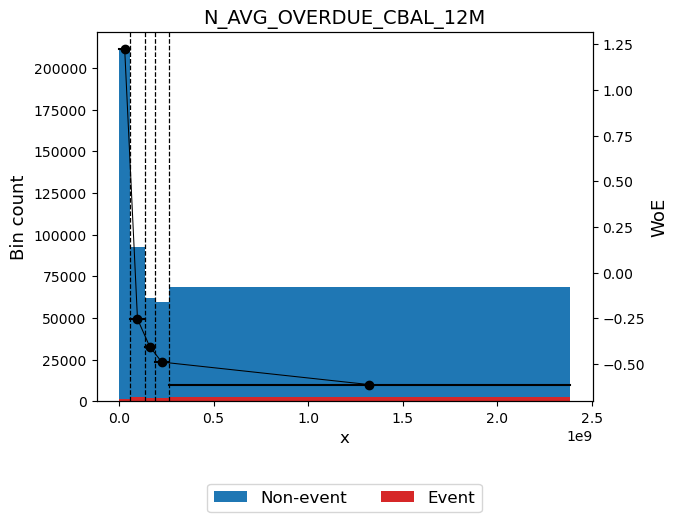


Processing: CBAL_TO_INC_12MON
   -> STATUS: OPTIMAL
   -> IV: 0.2126
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 8.13)",79775,0.161530,78979,796,0.009978,0.691645,0.056332,0.006904
1,"[8.13, 12.43)",122592,0.248227,121000,1592,0.012986,0.425106,0.036794,0.004565
2,"[12.43, 18.75)",154572,0.312981,151666,2906,0.018800,0.04921,0.000740,0.000093
3,"[18.75, 23.92)",75370,0.152611,73482,1888,0.025050,-0.244171,0.010250,0.001278
4,"[23.92, inf)",61561,0.124650,58999,2562,0.041617,-0.768961,0.108473,0.013235
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.212588,0.026074


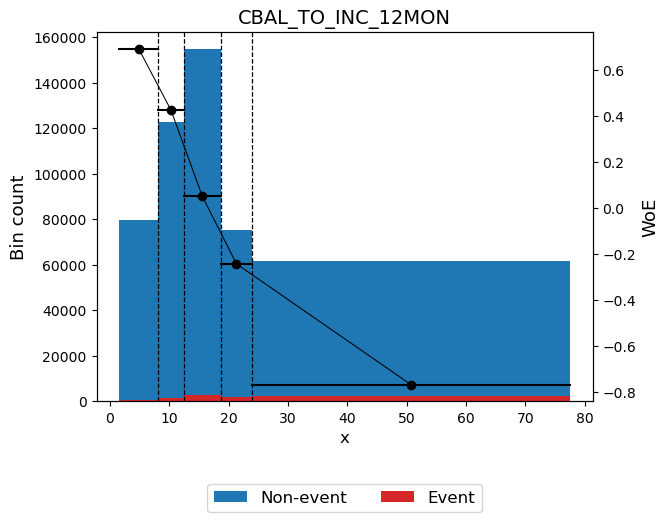


Processing: REAL_GDP_GROWTH_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0249
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.75)",114672,0.232191,112003,2669,0.023275,-0.168872,0.007187,0.000897
1,"[2.75, 4.97)",108191,0.219068,105713,2478,0.022904,-0.152417,0.005480,0.000684
2,"[4.97, 7.05)",138982,0.281414,136593,2389,0.017189,0.140437,0.005192,0.000648
3,"[7.05, inf)",132025,0.267327,129817,2208,0.016724,0.168345,0.006994,0.000873
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.024853,0.003103


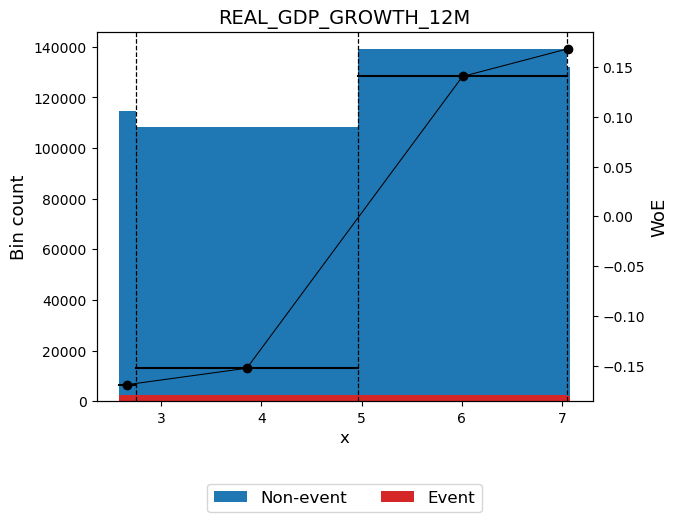

In [ ]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", "PURCOD_MIN",
    "OCCUPATION_TYPE", "TRINHDO", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", "SOCIF", "year",
    "bad_current", "CASE_ID", target_col,
    "SNAPSHOT_DATE", "CURE_DATE"
]

candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="cp",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [5]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 41


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,MAX_DPD_12M,1.2980,Tăng (Thuận),10.90%,100.00%,6,PASS
1,MAX_DPD_12M_OBS,1.2980,Tăng (Thuận),10.90%,100.00%,6,PASS
2,SUM_ALL_OD_12M,1.1469,Tăng (Thuận),12.11%,100.00%,6,PASS
3,N_AVG_OVERDUE_CBAL_12M,0.5224,Tăng (Thuận),12.02%,100.00%,6,PASS
4,N_AVG_DEPOSIT_12M,0.4957,Giảm (Nghịch),18.14%,100.00%,6,PASS
5,N_AVG_CD_12M,0.4957,Giảm (Nghịch),18.14%,100.00%,6,PASS
6,N_AVG_DEPOSIT_6M,0.4957,Giảm (Nghịch),18.14%,100.00%,6,PASS
7,N_AVG_DD_12M,0.4957,Giảm (Nghịch),18.14%,100.00%,6,PASS
8,COLLATERAL_VALUE,0.4610,Giảm (Nghịch),10.95%,100.00%,7,PASS
9,LTV,0.4502,Tăng (Thuận),12.04%,100.00%,5,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [6]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 10 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['CBAL_LONGTERM_LOAN', 'CBAL_SHORTTERM_LOAN', 'OCCUPATION_TYPE', 'TIME_TO_OP_MAX', 'CNT_CREDIT_CARDS', 'DURATION_MAX', 'AMT_VAR_6M', 'CNT_OTHER_PRODUCTS', 'C_GIOITINH', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 31


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...
  -> Đang tính toán WoE cho 31 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 31
Số biến giữ lại:   17
Số biến bị loại:   14

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,MAX_DPD_12M_OBS,1.2980,Corr với MAX_DPD_12M (r=1.00)
1,SUM_ALL_OD_12M,1.1469,Corr với MAX_DPD_12M (r=0.93)
2,N_AVG_DEPOSIT_6M,0.4957,Corr với N_AVG_DEPOSIT_12M (r=1.00)
3,N_AVG_CD_12M,0.4957,Corr với N_AVG_DEPOSIT_12M (r=1.00)
4,N_AVG_DD_12M,0.4957,Corr với N_AVG_DEPOSIT_12M (r=1.00)
5,LTV,0.4502,Corr với COLLATERAL_VALUE (r=0.91)
6,SOHUUNHA,0.4308,Corr với COLLATERAL_VALUE (r=0.93)
7,CBAL_TO_INC_12MON,0.2126,Corr với DTI_RATIO (r=1.00)
8,UTILIZATION_RATE,0.1733,Corr với DTI_RATIO (r=0.87)
9,FLAG_CASH_ADVANCE,0.0497,Corr với AMT_CASH_ADVANCE_12M (r=1.00)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,MAX_DPD_12M,1.2980,10.90%,100.00%
1,N_AVG_OVERDUE_CBAL_12M,0.5224,12.02%,100.00%
2,N_AVG_DEPOSIT_12M,0.4957,18.14%,100.00%
3,COLLATERAL_VALUE,0.4610,10.95%,100.00%
4,CNT_MIN_PAY_6M,0.2985,19.22%,100.00%
5,AVG_DAYS_PAST_DUE,0.2829,19.12%,100.00%
6,RATE_AVG,0.2648,11.15%,100.00%
7,DTI_RATIO,0.2126,12.47%,100.00%
8,PCT_PAYMENT_TO_BALANCE,0.1199,15.34%,100.00%
9,TUOI,0.1171,16.21%,100.00%


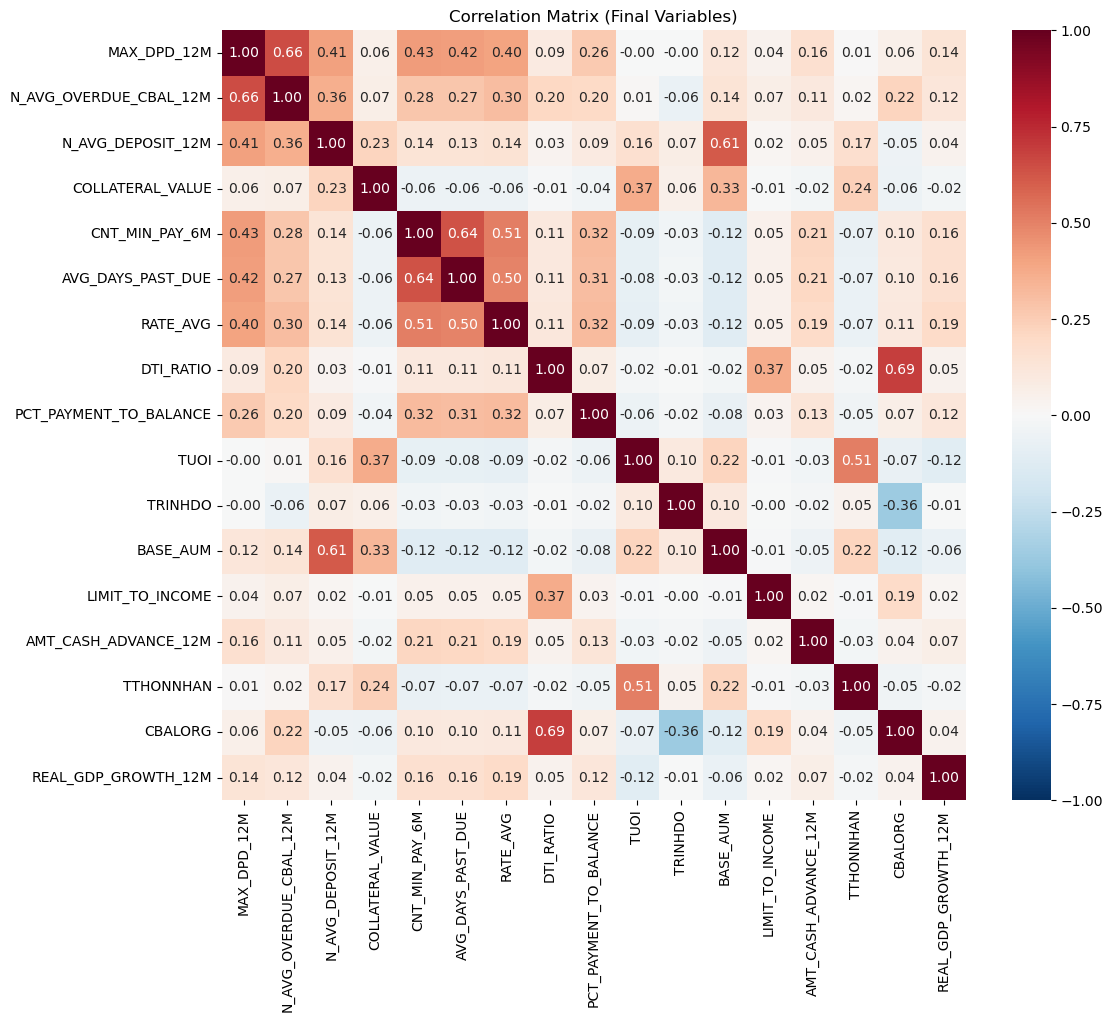

In [7]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- LOGIC ƯU TIÊN: ĐƯA DTI_RATIO LÊN ĐẦU ---
# priority_var = "DTI_RATIO"
# if priority_var in sorted_features:
#     sorted_features.remove(priority_var)
#     sorted_features.insert(0, priority_var)
#     print(f"  -> Đã đưa biến '{priority_var}' lên vị trí ưu tiên số 1.")
# else:
#     print(f"  -> Cảnh báo: '{priority_var}' không nằm trong danh sách biến (có thể đã bị loại vì IV quá thấp).")

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

LASSO REGRESSION 

In [8]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 15      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

# 1. Chuẩn bị dữ liệu WoE (Chạy ngầm)
X_woe_lasso = pd.DataFrame()
for feature in kept_vars:
    try:
        optb = binning_results[feature]
        x_raw = train[feature].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else train[feature]
        X_woe_lasso[feature] = optb.transform(x_raw, metric="woe")
    except: pass

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_woe_lasso)
y = train[TARGET_COL]

# 2. Ranking biến (Chạy 1 lần duy nhất)
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
lr.fit(X_scaled, y)
coefs_abs = np.abs(lr.coef_[0])

# 3. Lấy Top biến
df_imp = pd.DataFrame({'Variable': kept_vars, 'Imp': coefs_abs}).sort_values('Imp', ascending=False)
final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

# Đảm bảo DTI (Force keep)
if "DTI_RATIO" in kept_vars and "DTI_RATIO" not in final_vars_lasso:
    final_vars_lasso.pop()
    final_vars_lasso.append("DTI_RATIO")

kept_vars = final_vars_lasso # Cập nhật biến toàn cục
print(f"  -> Đã xong. Danh sách {len(kept_vars)} biến được chọn: {kept_vars}")


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> Đã xong. Danh sách 15 biến được chọn: ['MAX_DPD_12M', 'COLLATERAL_VALUE', 'DTI_RATIO', 'TRINHDO', 'N_AVG_DEPOSIT_12M', 'TUOI', 'BASE_AUM', 'N_AVG_OVERDUE_CBAL_12M', 'CBALORG', 'CNT_MIN_PAY_6M', 'AVG_DAYS_PAST_DUE', 'PCT_PAYMENT_TO_BALANCE', 'AMT_CASH_ADVANCE_12M', 'RATE_AVG', 'LIMIT_TO_INCOME']


In [9]:
# ============================================================
# BƯỚC 6: CHUẨN BỊ DỮ LIỆU FINAL (TRANSFORM ALL)
# ============================================================
print(f"\n[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...")

def transform_woe_silent(df, cols, binning_dict):
    out = pd.DataFrame()
    for c in cols:
        optb = binning_dict[c]
        x = df[c].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df[c]
        out[c] = optb.transform(x, metric="woe")
    return out

X_train_final = transform_woe_silent(train, kept_vars, binning_results)
X_oos_final   = transform_woe_silent(oos, kept_vars, binning_results)
X_oot_final   = transform_woe_silent(oot, kept_vars, binning_results)
y_train_full  = train[TARGET_COL]

# Tính sẵn Std Dev để tính Weight
std_devs = X_train_final.std()
print("  -> Đã chuẩn bị xong dữ liệu.")


[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...
  -> Đã chuẩn bị xong dữ liệu.


In [10]:
# ============================================================
# BƯỚC 7: VÉT CẠN TỔ HỢP (BRUTE-FORCE OPTIMIZED)
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    X_sub = X_data[vars_names]
    
    # Fit
    clf = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
    clf.fit(X_sub, y_data)
    coefs = clf.coef_[0]
    
    # Check 1: Dấu
    if np.any(coefs >= 0): return None
    
    # Check 2: Weight (3% - 35%)
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0: return None
    w = (imp / total) * 100
    if np.any(w < 3) or np.any(w > 35): return None
    
    # Check 3: Gini > 50%
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.3: return None
    
    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []
for k in range(BRUTE_FORCE_K_MIN, min(BRUTE_FORCE_K_MAX, len(kept_vars)) + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song (verbose=1: Chỉ hiện progress bar gọn gàng)
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_final, y_train_full, std_devs) for c in combos
)

valid_models = [r for r in results if r is not None]
print(f"  -> Hoàn tất! Tìm thấy {len(valid_models)} mô hình đạt chuẩn.")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 15 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 16384
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   12.7s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   53.4s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  2.1min
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  3.7min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  5.9min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed:  8.5min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed: 11.6min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed: 15.2min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed: 19.1min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed: 23.7min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed: 28.5min
[Parallel(n_jobs=15)]: Done 7170 tasks      | elapsed: 34.3min
[Parallel(n_jobs=15)]: Done 8420 tasks      | elapsed: 40.9min
[Parallel(n_jobs=15)]: Done 9770 tasks      | elapsed: 47.9min
[Parallel(n_jobs=15)]: Done 11220 tasks      

  -> Hoàn tất! Tìm thấy 676 mô hình đạt chuẩn.


[Parallel(n_jobs=15)]: Done 16384 out of 16384 | elapsed: 82.5min finished


In [11]:
# ============================================================
# BƯỚC 8: CHỌN MÔ HÌNH TỐT NHẤT & VALIDATE
# ============================================================
if valid_models:
    # Convert to DF & Sort
    df_res = pd.DataFrame(valid_models, columns=['Num_Vars', 'Vars', 'Coefs', 'Weights', 'Gini_Train'])
    df_res = df_res.sort_values('Gini_Train', ascending=False).reset_index(drop=True)
    
    # Lấy Best Model (Rank 1)
    best_row = df_res.iloc[0]
    best_vars = best_row['Vars']
    
    print(f"\n[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top {len(valid_models)})")
    print("-" * 60)
    print(f"Danh sách biến ({len(best_vars)}): {best_vars}")
    
    # Validate OOS/OOT
    def get_gini(X, y, model_cols, model_obj):
        # Lưu ý: model_obj là Logit của statsmodels nên cần add_constant
        X_new = sm.add_constant(X[model_cols])
        pred = model_obj.predict(X_new)
        return 2 * roc_auc_score(y, pred) - 1

    # Fit lại bằng Statsmodels để ra report đẹp
    X_train_best = sm.add_constant(X_train_final[best_vars])
    final_logit = sm.Logit(y_train_full, X_train_best).fit(disp=0)
    
    # Tính Gini các tập
    g_train = 2 * roc_auc_score(y_train_full, final_logit.predict(X_train_best)) - 1
    
    X_oos_best = sm.add_constant(X_oos_final[best_vars])
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], final_logit.predict(X_oos_best)) - 1
    
    X_oot_best = sm.add_constant(X_oot_final[best_vars])
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], final_logit.predict(X_oot_best)) - 1
    
    # In bảng kết quả gọn đẹp
    print("-" * 60)
    print(f"{'METRIC':<10} | {'VALUE':<10} | {'NOTES'}")
    print("-" * 60)
    print(f"{'Gini Train':<10} | {g_train:.2%}    |")
    print(f"{'Gini OOS':<10} | {g_oos:.2%}    | Diff: {g_train - g_oos:.2%}")
    print(f"{'Gini OOT':<10} | {g_oot:.2%}    | Diff: {g_train - g_oot:.2%}")
    print("-" * 60)
    
    if (g_train - g_oos > 0.1) or (g_train - g_oot > 0.1):
        print("⚠️ CẢNH BÁO: Có dấu hiệu Overfitting!")
    else:
        print("✅ KẾT QUẢ TỐT: Mô hình ổn định.")

    # In bảng hệ số và trọng số
    print("\n>>> CHI TIẾT BIẾN & TRỌNG SỐ:")
    res_detail = pd.DataFrame({
        'Variable': best_vars,
        'Coef': final_logit.params.drop('const').values,
        'P-value': final_logit.pvalues.drop('const').values,
        'Weight(%)': best_row['Weights']
    }).sort_values('Weight(%)', ascending=False)
    
    display(res_detail.style.format({
        'Coef': '{:.4f}', 'P-value': '{:.4f}', 'Weight(%)': '{:.2f}'
    }))
    
else:
    print("❌ Không tìm thấy mô hình nào thỏa mãn tiêu chí.")


[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top 676)
------------------------------------------------------------
Danh sách biến (8): [np.str_('MAX_DPD_12M'), np.str_('COLLATERAL_VALUE'), np.str_('TRINHDO'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('TUOI'), np.str_('CBALORG'), np.str_('CNT_MIN_PAY_6M'), np.str_('LIMIT_TO_INCOME')]
------------------------------------------------------------
METRIC     | VALUE      | NOTES
------------------------------------------------------------
Gini Train | 69.08%    |
Gini OOS   | 69.27%    | Diff: -0.18%
Gini OOT   | 69.26%    | Diff: -0.17%
------------------------------------------------------------
✅ KẾT QUẢ TỐT: Mô hình ổn định.

>>> CHI TIẾT BIẾN & TRỌNG SỐ:


,Variable,Coef,P-value,Weight(%)
0,MAX_DPD_12M,-0.9190,0.0000,32.19
1,COLLATERAL_VALUE,-0.8532,0.0000,23.60
2,TRINHDO,-1.1820,0.0000,14.35
5,CBALORG,-1.3328,0.0000,10.10
4,TUOI,-0.5233,0.0000,6.37
3,N_AVG_DEPOSIT_12M,-0.2022,0.0000,6.00
7,LIMIT_TO_INCOME,-0.5496,0.0000,4.39
6,CNT_MIN_PAY_6M,-0.1685,0.0000,3.00


In [14]:
# ============================================================
# BƯỚC CUỐI (SỬA ĐỔI): Tự tạo ID nếu không có CASE_ID
# ============================================================

# 1. Reset index để lấy Index làm ID (đặt tên là CASE_ID cho thống nhất)
train_reset = train.reset_index().rename(columns={'index': 'CASE_ID'})
oos_reset   = oos.reset_index().rename(columns={'index': 'CASE_ID'})
oot_reset   = oot.reset_index().rename(columns={'index': 'CASE_ID'})

# Đánh dấu nguồn (để sau này tính Gini riêng)
train_reset['DATA_TYPE'] = 'TRAIN'
oos_reset['DATA_TYPE']   = 'OOS'
oot_reset['DATA_TYPE']   = 'OOT'

# 2. Chọn biến ID thực tế (Nếu bạn có SOCIF thì dùng SOCIF, không thì dùng cái CASE_ID vừa tạo)
ID_COL = "SOCIF" if "SOCIF" in train.columns else "CASE_ID"

# 3. Gộp dữ liệu
# Lưu ý: Thêm DATA_TYPE vào export để sau này tính Gini riêng từng tập
needed_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL] + best_vars
df_full_seg = pd.concat([
    train_reset[needed_cols] if ID_COL == "CASE_ID" else train[needed_cols], 
    oos_reset[needed_cols] if ID_COL == "CASE_ID" else oos[needed_cols], 
    oot_reset[needed_cols] if ID_COL == "CASE_ID" else oot[needed_cols]
], axis=0).reset_index(drop=True)

# 4. Transform & Predict (Giữ nguyên)
X_woe_full = pd.DataFrame()
for col in best_vars:
    optb = binning_results[col]
    x_raw = df_full_seg[col].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df_full_seg[col]
    X_woe_full[col] = optb.transform(x_raw, metric="woe")

X_final = sm.add_constant(X_woe_full)
df_full_seg['PREDICTED_PROB'] = final_logit.predict(X_final)

# 5. Xuất file (QUAN TRỌNG: Đã thêm cột DATA_TYPE)
# Xuất thêm DATA_TYPE để tí nữa gộp 3 file lại vẫn biết đâu là Train/OOS/OOT
output_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL, "PREDICTED_PROB"]
output_filename = f"seg1_result.parquet"

df_full_seg[output_cols].to_parquet(output_filename, index=False)
print(f"-> Đã xuất file (kèm DATA_TYPE): {output_filename}")

-> Đã xuất file (kèm DATA_TYPE): seg1_result.parquet


In [13]:
df_res.to_parquet("seg1_top_model.parquet")